In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [50]:
df= pd.read_csv('Datasets Diabetes.csv')
df.head()

,Numbering,Fungal Infection,Slow Healing,Numnes,Dry Mouth & Itchy Skin,Decreased Vision,Nausea & Vomitting,Hunger & Fatigue,Unnecessary Weight Loss,Urine & often Thrist,Outcome
0,1,1,1,1,1,0,0,0,0,1,0
1,2,0,0,0,1,0,0,1,0,0,0
2,3,1,1,1,0,1,0,0,1,0,0
3,4,1,0,1,0,1,1,1,1,1,0
4,5,1,1,1,0,1,0,1,1,1,0


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# df['Slow Healing'].hist()

In [ ]:
import matplotlib.pyplot as plt
DiabaticHeaders=['User','Age','Gender','Slow healing','Gum Infection','Vaginal Infection','Skin Infection','Blurry Vision','Irritable','Tired and Weak','Weight Loss UnNeccasry','Urinating often','Glucose Level','Feeling Thirsty','Blood Pressure','Heartbeat']

for i in range (0,16):
    x=df[df['Outcome']==DiabaticHeaders[i]]
    plt.scatter(x['Glucose Level'],x['Skin'],label=DiabaticHeaders[i])
    plt.xlabel('Glucose Level')
    plt.ylabel('Heartbeat')
    plt.legend()
    
    

<Axes: >

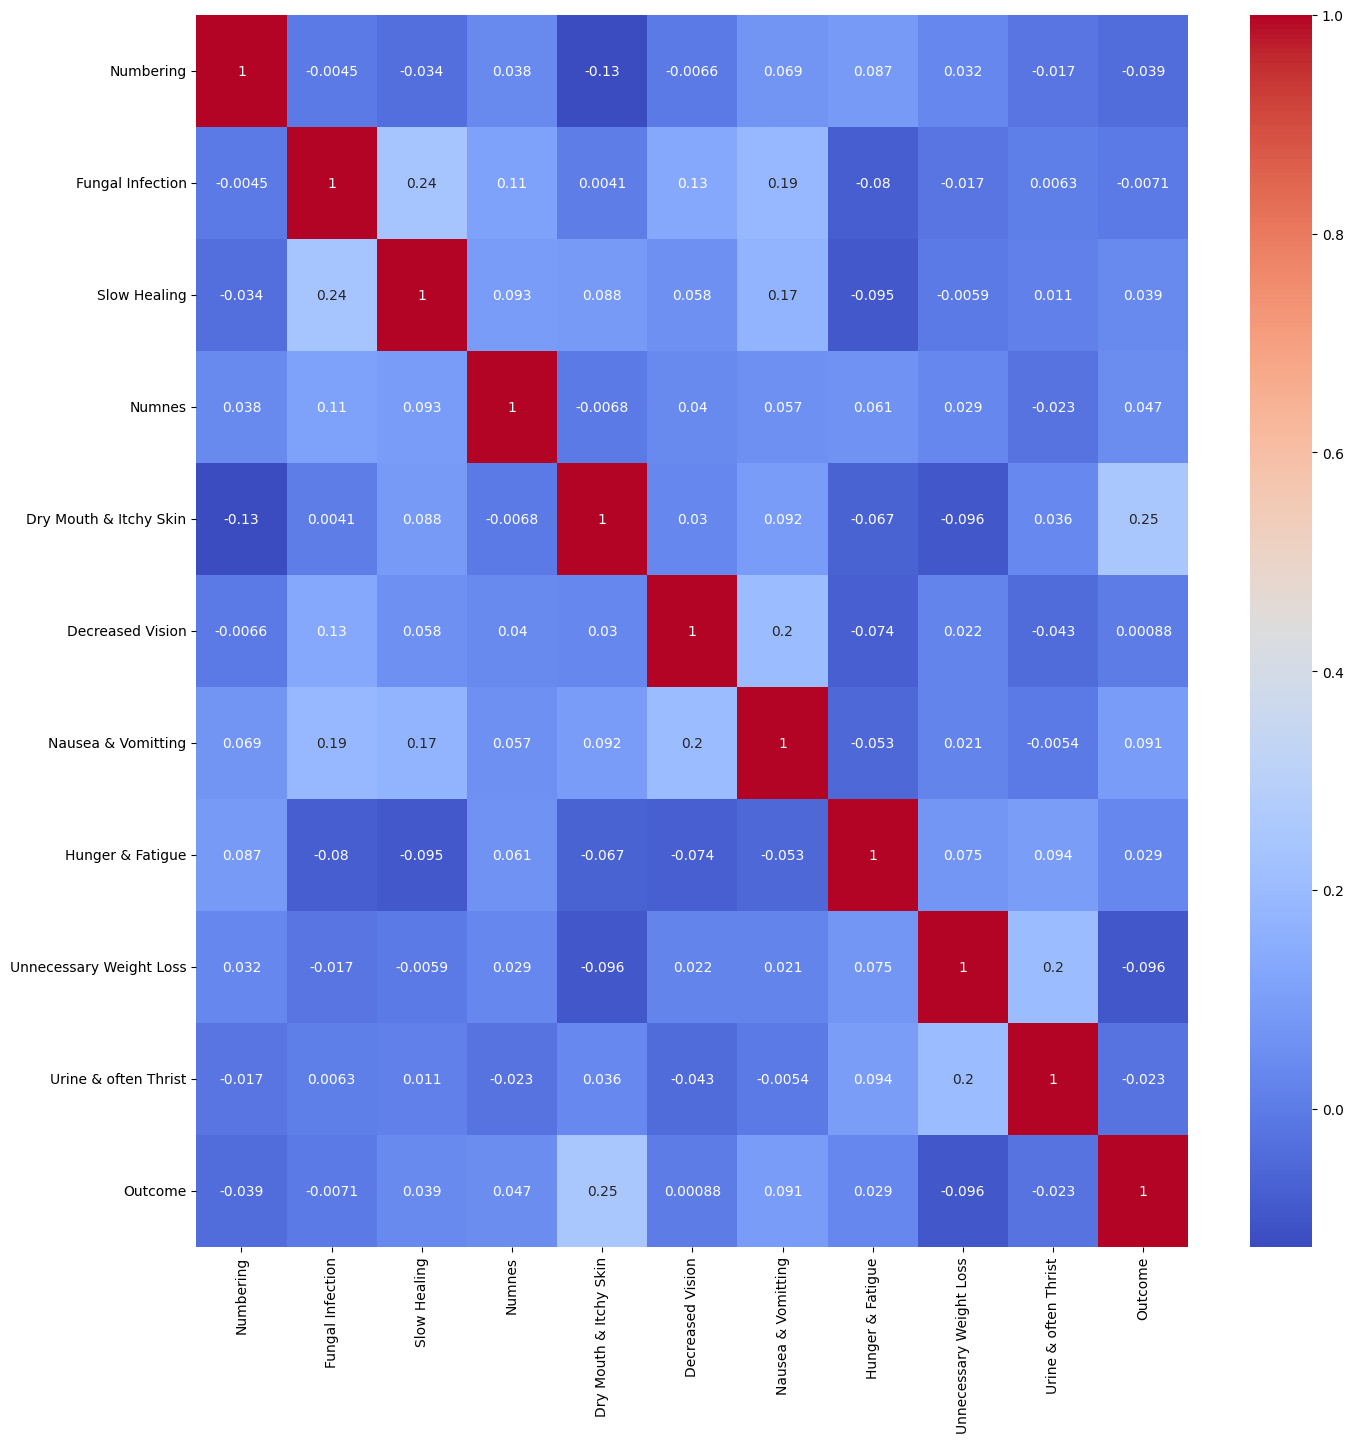

In [51]:
import seaborn as sns
columns = df.select_dtypes(include=np.number)
corr= columns.corr()
fig,ax=plt.subplots(figsize=(16,16))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [58]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=0)

In [53]:
# from sklearn.model_selection import train_test_split
# x=df.drop(columns=['Outcome'])
# y=df['Outcome']
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=0)

# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()
# model.fit(x_train,y_train)
# # prediction=model.predict([[1,21,1,1,1,1,1,1,1,1,1,1,1,1,1]])
# # print(prediction)
# print('Accuracy of Model is: ', model.score(x_train,y_train)*100)

Accuracy of Model is:  68.57142857142857


c:\Users\Sigma Male\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
# prediction=model.predict(x_test)
# print(prediction)
print('Accuracy of Model is: ', model.score(x_test, y_test )*100)

ValueError: Found input variables with inconsistent numbers of samples: [300, 700]

In [61]:
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [62]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)
    